# Basics of cluster analysis

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [2]:
data = pd.read_csv('3.01. Country clusters.csv')

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Map the data

In [4]:
data_map = data.copy()
data_map['Language'] = data_map['Language'].map({'English':0,
                                                 'French':1,
                                                 'German':2})
data_map

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Plot the data

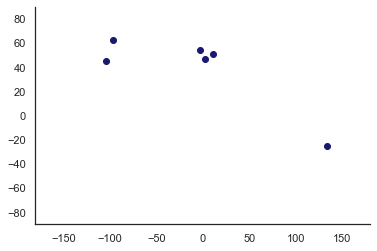

In [5]:
sns.set_style('white')
plt.scatter(data['Longitude'],data['Latitude'], color = 'midnightblue')
plt.xlim(-180,180)
plt.ylim(-90,90)
sns.despine()
plt.show()

## Select the features

In [6]:
x = data_map.iloc[:,1:4]

In [7]:
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


## Clustering

In [10]:
wcss = []

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [11]:
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

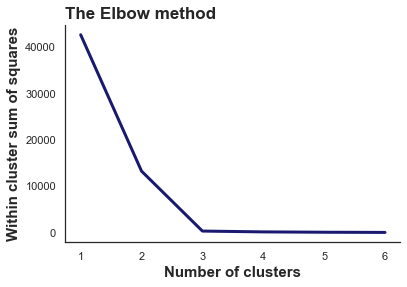

In [12]:
num_cluster = range(1,7)
plt.plot(num_cluster, wcss, color = 'midnightblue', lw = 3)
plt.title("The Elbow method",
          fontsize = 17,
          fontweight = 'bold',
          loc = 'left')
plt.xlabel('Number of clusters',
            fontsize = 15,
            fontweight = 'bold')
plt.ylabel('Within cluster sum of squares',
            fontsize = 15,
            fontweight = 'bold')
sns.despine()
plt.show()

In [13]:
kmeans = KMeans(3)

In [15]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [16]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 1, 1, 1, 2])

In [17]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


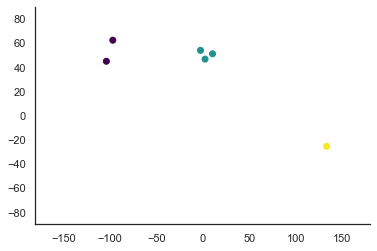

In [18]:
sns.set_style('white')
plt.scatter(data_with_clusters['Longitude'],
            data_with_clusters['Latitude'],
            c=data_with_clusters['Cluster'],
            cmap='viridis')
plt.xlim(-180,180)
plt.ylim(-90,90)
sns.despine()
plt.show()